Hunter S. DiCicco

DS440-002: Data Science Capstone

Dr. Rigas, for Drs. Niki and Paris Von Lockette

# Model Exploration

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
czc = pd.read_csv("../project/volume/data/raw/czchar.csv",
                  skiprows=list(range(5)) + [7], # the first few rows contain human-readable title + informative paragraphs
                  header=1) # 0-indexed row 6 is the header

ipums = pd.read_stata('../project/volume/data/raw/ipums_met_arr_sch_100K.dta')


In [26]:
ipums.head()

,year,metarea,metaread,met2013,race,multyear,datanum,serial,cbserial,hhwt,...,imputed_networth_1980,imputed_round_1980,matched_to_scf_1980,metro_dissimilarity_wb,metro_isolation_b,in_metro_seg,arrests,in_arrests,school_msa_dissimilarity,in_school_seg
0,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,856.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
1,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1086.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
2,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1094.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
3,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1338.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
4,1960.0,860.0,8600.0,NaN,1.0,NaN,2.0,2097.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,0.0,171.0,1.0,NaN,0.0


In [4]:
ipums.describe()

,year,metarea,metaread,met2013,race,multyear,datanum,serial,cbserial,hhwt,...,imputed_networth_1980,imputed_round_1980,matched_to_scf_1980,metro_dissimilarity_wb,metro_isolation_b,in_metro_seg,arrests,in_arrests,school_msa_dissimilarity,in_school_seg
count,100000.000000,100000.000000,100000.00000,60158.000000,100000.000000,39281.000000,100000.000000,1.000000e+05,4.312900e+04,100000.000000,...,4.310000e+02,1113.000000,1113.000000,71031.000000,71031.000000,100000.000000,76886.000000,100000.000000,65051.000000,100000.000000
mean,1998.283270,461.522210,4615.63268,30729.450447,1.756540,2015.008706,2.761390,2.722954e+06,1.835229e+12,22.631150,...,2.251510e+05,3.462713,0.387242,65.589831,21.202597,0.710310,73109.311682,0.768860,63.875699,0.651450
std,18.949024,240.691278,2406.97095,10625.870835,1.763252,1.419846,1.880338,1.788489e+06,5.744108e+11,28.146234,...,3.613156e+05,1.000316,0.487339,13.909001,23.084878,0.453621,96899.079428,0.421564,13.788166,0.476514
min,1960.000000,4.000000,40.00000,0.000000,1.000000,2013.000000,1.000000,1.430000e+02,6.270000e+02,0.000000,...,-1.377100e+04,1.000000,0.000000,18.267599,0.090000,0.000000,0.000000,0.000000,12.519340,0.000000
25%,1980.000000,228.000000,2281.00000,19820.000000,1.000000,2014.000000,1.000000,1.024028e+06,2.013001e+12,7.820656,...,2.420970e+04,3.000000,0.000000,56.244148,5.826673,0.000000,13464.000000,1.000000,54.214546,0.000000
50%,2000.000000,512.000000,5120.00000,35620.000000,1.000000,2015.000000,2.000000,2.701482e+06,2.015000e+12,20.000000,...,7.070116e+04,4.000000,0.000000,67.042152,8.507121,1.000000,38488.000000,1.000000,66.072006,1.000000
75%,2017.000000,620.000000,6200.00000,36740.000000,1.000000,2016.000000,5.000000,4.137900e+06,2.016001e+12,22.000000,...,2.577753e+05,4.000000,1.000000,76.887886,36.157754,1.000000,101060.000000,1.000000,73.595000,1.000000
max,2017.000000,936.000000,9360.00000,49740.000000,9.000000,2017.000000,5.000000,6.859169e+06,2.017002e+12,703.000000,...,2.625900e+06,4.000000,1.000000,97.528165,89.934390,1.000000,554558.000000,1.000000,97.500000,1.000000


In [5]:
est = [('clf', ExtraTreesRegressor(n_estimators=15))]
pl = Pipeline(est)

In [6]:
cols = ['Income Growth 2000-2006/10',
        'State EITC Exposure',
        'School Expenditure per Student',
        'Labor Force Participation Rate',
        'Social Capital Index']

czc = czc.dropna(subset=cols)

y = czc['Gini']
x = czc[cols]

pl.fit(x, y)

Pipeline(memory=None,
         steps=[('clf',
                 ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=15, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
         verbose=False)

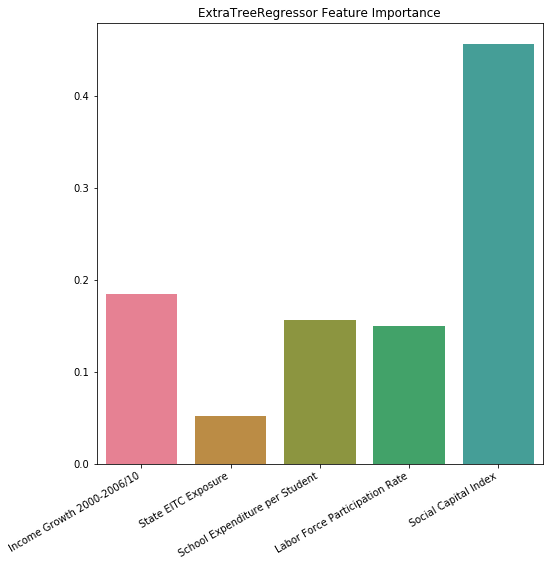

In [23]:
fig, ax = plt.subplots(figsize=(8,9))
sns.barplot(cols, pl['clf'].feature_importances_,
           palette=sns.color_palette("husl", 8),
           ax=ax)
plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.title(f"{str(pl['clf'].base_estimator_).split('(')[0]} Feature Importance");

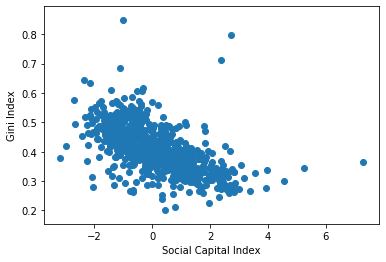

In [8]:
plt.scatter(czc['Social Capital Index'], czc['Gini']);
plt.xlabel('Social Capital Index');
plt.ylabel('Gini Index');